<a href="https://colab.research.google.com/github/v1p3rrr/data-analysis-hse/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soldatov Ilya & Konnov Andrey

# Homework 1

In [155]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os, re

In [156]:
df = pd.read_csv("/content/Salary_Data.csv")

##1

Dataset sample

In [157]:
df.sample(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Math exam score,Programming exam score
297,37.0,Male,Bachelor's,Senior Marketing Analyst,9.0,100000.0,90,74
1076,27.0,Male,Bachelor's,Software Engineer,4.0,160000.0,56,48
5747,32.0,Female,Master's Degree,Marketing Manager,8.0,120000.0,66,68
1796,28.0,Female,Bachelor's Degree,Front end Developer,2.0,65000.0,68,73
5253,31.0,Male,Master's Degree,Financial Analyst,6.0,100000.0,63,65


**Data types and non-null count**

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     6698 non-null   float64
 1   Gender                  6698 non-null   object 
 2   Education Level         6698 non-null   object 
 3   Job Title               6698 non-null   object 
 4   Years of Experience     6698 non-null   float64
 5   Salary                  6698 non-null   float64
 6   Math exam score         6698 non-null   int64  
 7   Programming exam score  6698 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 418.8+ KB


**Amount of rows (observations) and columns (variables)**

In [159]:
df.shape

(6698, 8)

**Amount of missing values = there are no missing values in this dataset**

In [160]:
df.isna().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0
Math exam score,0
Programming exam score,0


**Measure scale:**
- Age: ratio scale
- Gender: nominal
- Education: ordinal
- Job: nominal
- Years: ratio
- Salary: ratio
- Math exam score: ratio
- Programming exam score: ratio

## 2

### Frequency Measurements

In [161]:
gender_counts = df['Gender'].value_counts()
education_counts = df['Education Level'].value_counts()
job_title_counts = df['Job Title'].value_counts()
unique_job_titles_count  = df['Job Title'].nunique()

print(gender_counts,"\n")
print(education_counts,"\n")
print(job_title_counts,"\n")
print("Jobs number:", unique_job_titles_count)

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64 

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64 

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64 

Jobs number: 191


In [162]:
# Male to female ratio
male_count = gender_counts.get('Male', 0)
female_count = gender_counts.get('Female', 0)
total_count = male_count + female_count
male_female_ratio = male_count / female_count
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print(f"Male to Female ratio: {male_female_ratio}")
print(f"Male percentage: {male_percentage:.2f}%")
print(f"Female percentage: {female_percentage:.2f}%")

Male to Female ratio: 1.2183869897112511
Male percentage: 54.92%
Female percentage: 45.08%


In [163]:
# Transforming differently named degrees to united format
mapping = {
    "Bachelor's": "Bachelor's Degree",
    "Bachelor's Degree": "Bachelor's Degree",
    "Master's": "Master's Degree",
    "Master's Degree": "Master's Degree",
    "PhD": "PhD",
    "phD": "PhD",
    "High School": "High School"
}
df['Education Level'] = df['Education Level'].map(mapping)
unified_counts = df['Education Level'].value_counts()
print(unified_counts)

Education Level
Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
High School           448
Name: count, dtype: int64


- There are slightly more males than females

- The most respondents in this data set have got a bachelor's education degree, the least number got only high school education

### Central Tendency Measurements

In [164]:
df.describe() # Summary statistics

,Age,Years of Experience,Salary,Math exam score,Programming exam score
count,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061,65.835473,66.961033
std,7.615784,6.060291,52789.792507,13.724767,13.644765
min,21.000000,0.000000,350.000000,3.000000,12.000000
25%,28.000000,3.000000,70000.000000,57.000000,58.000000
50%,32.000000,7.000000,115000.000000,66.000000,68.000000
75%,38.000000,12.000000,160000.000000,76.000000,76.000000
max,62.000000,34.000000,250000.000000,100.000000,100.000000


In [165]:
df[['Age', 'Years of Experience', 'Salary']].mean() # Mean

,0
Age,33.623022
Years of Experience,8.095178
Salary,115329.253061


In [166]:
df.mode() # Most frequent values

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Math exam score,Programming exam score
0,27.0,Male,Bachelor's Degree,Software Engineer,2.0,140000.0,63,75


In [167]:
df[['Age', 'Years of Experience', 'Salary']].median() # Median

,0
Age,32.0
Years of Experience,7.0
Salary,115000.0


### Dispersion Measurements

In [168]:
variance = df['Salary'].var()
std_deviation = df['Salary'].std()
range_salary = df['Salary'].max() - df['Salary'].min()
quantiles = df[['Age', 'Years of Experience', 'Salary']].quantile([0.25, 0.5, 0.75])

print("Variance:", variance)
print("Standard Deviation:", std_deviation)
print("Range (between min and max values):", range_salary)
print("Quantiles:\n", quantiles)

Variance: 2786762192.9320683
Standard Deviation: 52789.792506999576
Range (between min and max values): 249650.0
Quantiles:
        Age  Years of Experience    Salary
0.25  28.0                  3.0   70000.0
0.50  32.0                  7.0  115000.0
0.75  38.0                 12.0  160000.0


### Distribution characteristics

In [169]:
df[['Age', 'Years of Experience', 'Salary']].skew()
# The age and experience is highly positively skewed. The salary is close to normal distribution range

,0
Age,0.905123
Years of Experience,0.980766
Salary,0.057214


In [170]:
df[['Age', 'Years of Experience', 'Salary']].kurtosis()
# Age is relatively close to normal distribution
# Experience is leptokurtic, salary is heavily platykurtic

,0
Age,0.186167
Years of Experience,0.766842
Salary,-1.167007


Histograms to show these properties:

<Axes: >

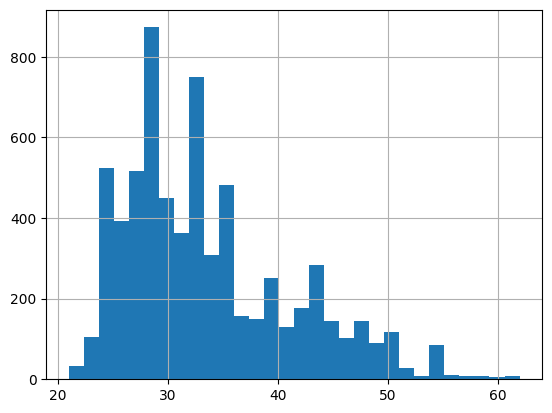

In [171]:
df['Age'].hist(bins=30)

There are more younger and middle-aged (under 40) employees

<Axes: >

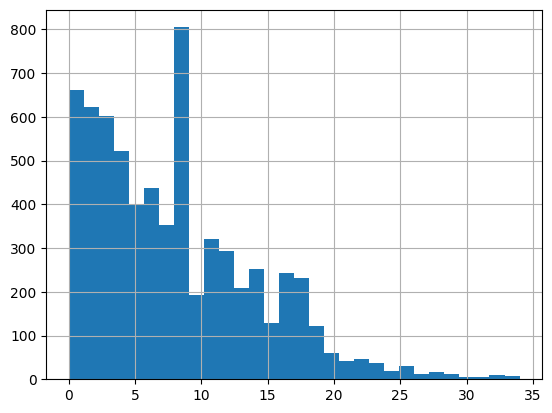

In [172]:
df['Years of Experience'].hist(bins=30)

There are more less-experienced employees

<Axes: >

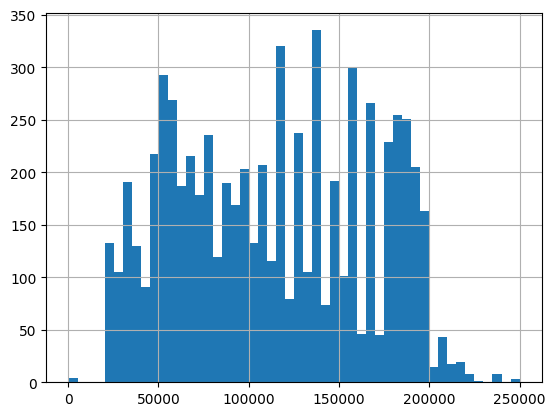

In [173]:

df['Salary'].hist(bins=50)

Most salaries go between ~25000 and 200000, starting right from ~25k. Some exceptional positions have a salary above the 200k

In [174]:
df[['Age', 'Years of Experience', 'Salary']].corr() #Correlation between Age&Exp, Age&Salary, Exp&Salary

,Age,Years of Experience,Salary
Age,1.000000,0.937725,0.728061
Years of Experience,0.937725,1.000000,0.808968
Salary,0.728061,0.808968,1.000000


Both age and years of experience are positively correlated with salary, but experience has a slightly stronger correlation with salary compared to age.

Years of experience seems to be the more influential factor in determining salary compared to age, though both are important factors.

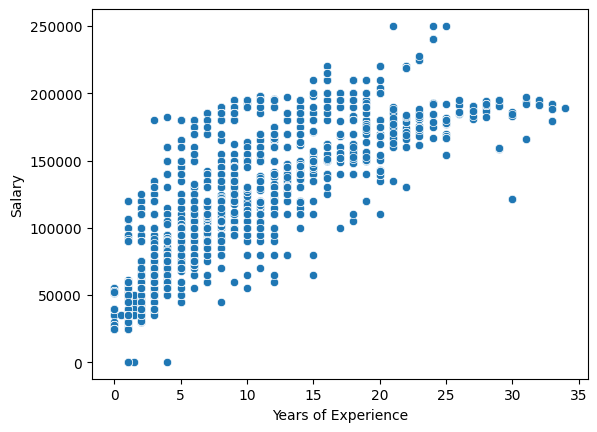

In [175]:
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.show()

As it's stated above, there's a strong positive correlation between experience and salary, so more experience you have the more salary you get

 Distribution of salary among male and female respondents

<ipython-input-176-ebc1e941d9df>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')


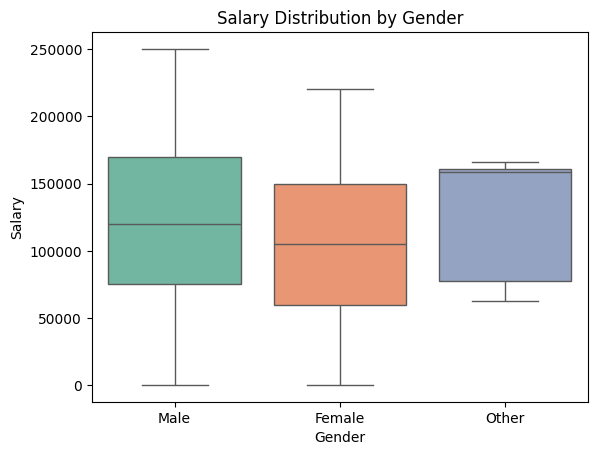

In [176]:
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')

plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

Female employees are paid less than males

### Pivot tables

In [177]:
pd.pivot_table(df, values='Salary', index='Job Title', aggfunc='mean').sort_values(by='Salary', ascending=False)
# Pivot table with mean salary for each job kind

,Salary
Job Title,
Chief Technology Officer,250000.000000
CEO,250000.000000
Chief Data Officer,220000.000000
Director of Data Science,204561.403509
VP of Finance,200000.000000
...,...
Juniour HR Coordinator,32000.000000
Junior Sales Associate,28211.267606
Delivery Driver,28000.000000


We can come to a obvious conclusion that head managing roles earn the most and junior positions have the smallest salaries

##3

#### - **Are there more male or female employees in the sample?**

In [178]:
# Male to female ratio
male_count = gender_counts.get('Male', 0)
female_count = gender_counts.get('Female', 0)
total_count = male_count + female_count
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100
relative_percentage_difference = ((male_percentage - female_percentage) / female_percentage) * 100


print(f"Male to Female ratio: {male_female_ratio}")
print(f"Male percentage: {male_percentage:.2f}%")
print(f"Female percentage: {female_percentage:.2f}%")
print(f"Relative percentage difference (more males than females): {relative_percentage_difference:.2f}%")

Male to Female ratio: 1.2183869897112511
Male percentage: 54.92%
Female percentage: 45.08%
Relative percentage difference (more males than females): 21.84%


There are around 22% more males than females

#### - **Explore the distribution of male and female employees on different job positions (Take 5 most frequent job titles).**

Distribution of salary among different genders

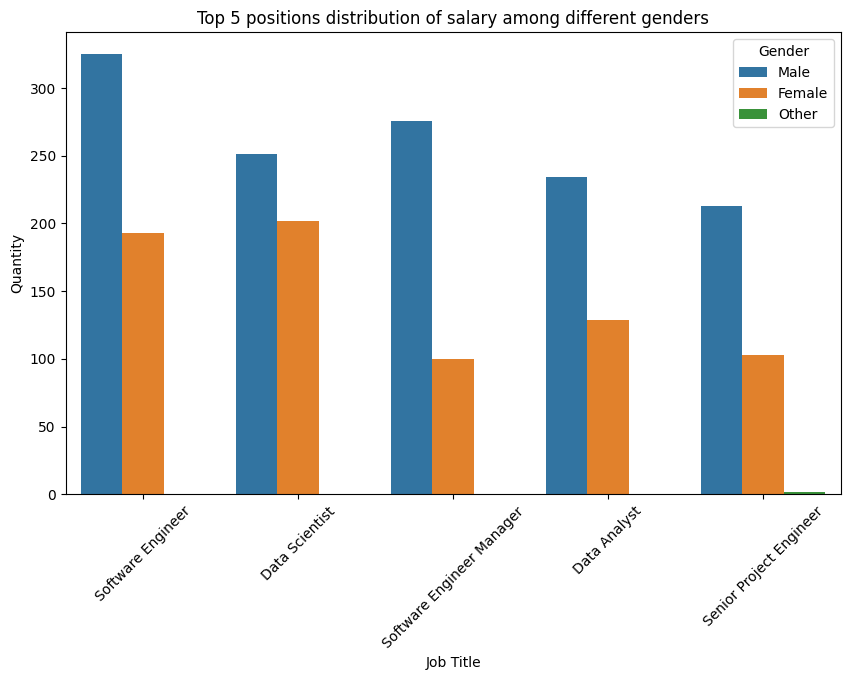

In [179]:
top_positions = df['Job Title'].value_counts().head(5).index

df_top_positions = df[df['Job Title'].isin(top_positions)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_positions, x='Job Title', hue='Gender', order=top_positions)
plt.title('Top 5 positions distribution of salary among different genders')
plt.xlabel('Job Title')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

We can see that women are underpaid in top positions

#### - **Describe the distribution of salary in the sample.**

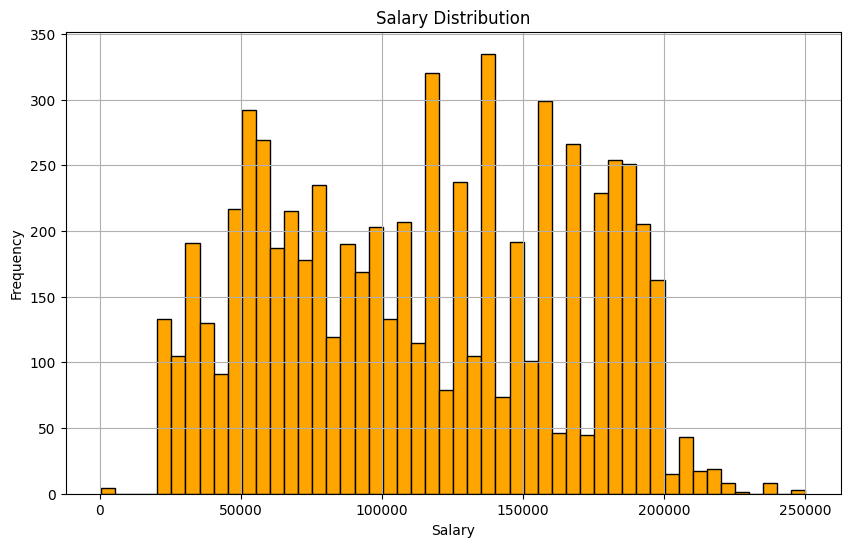

In [180]:
plt.figure(figsize=(10, 6))
plt.hist(df['Salary'], bins=50, edgecolor='black', color='orange')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Salary distribution has got some significant drops closer to the middle of plot but it is justified by the fact that values are rounded and somewhat discrete. Overall it has a look somewhat close to normal distribution (but drop around 100k doesn't allow us to really call it like that)

#### - **Describe the distribution of age in the sample.**

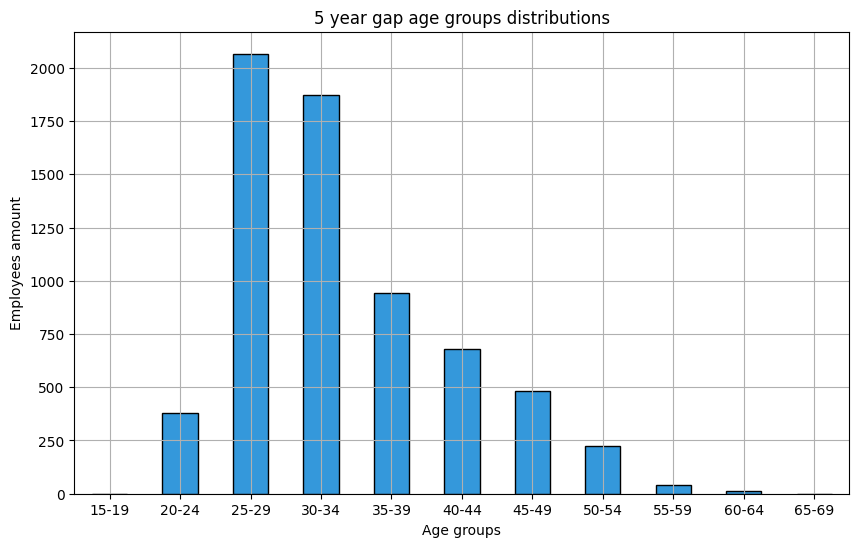

In [181]:
bins = range(15, 75, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_distribution = df['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', color='#3498db', edgecolor='black', figsize=(10, 6))
plt.title('5 year gap age groups distributions')
plt.xlabel('Age groups')
plt.ylabel('Employees amount')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

The most employed age group according to this dataset is 25-29 years old followed by 30-34 years old.

#### - **Does experience affect salary?**

<ipython-input-182-fd03957ef2f3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby('Experience Bin').agg({'Salary': 'mean'}).reset_index()


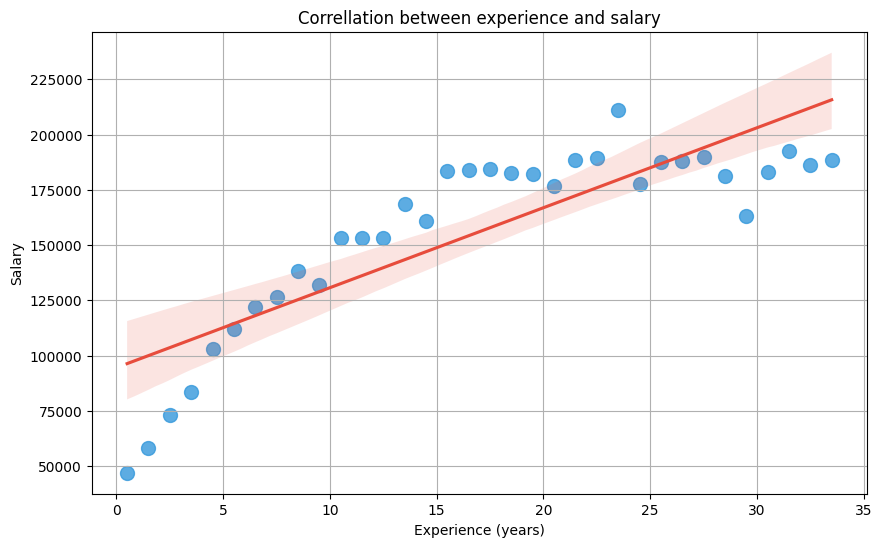

In [182]:
plt.figure(figsize=(10, 6))

bins = np.arange(0, df['Years of Experience'].max() + 1, 1)
df['Experience Bin'] = pd.cut(df['Years of Experience'], bins=bins)

agg_df = df.groupby('Experience Bin').agg({'Salary': 'mean'}).reset_index()
agg_df['Years of Experience'] = agg_df['Experience Bin'].apply(lambda x: x.mid)

sns.regplot(x='Years of Experience', y='Salary', data=agg_df, scatter_kws={'color': '#3498db', 's': 100}, line_kws={'color': '#e74c3c'})

plt.title('Correllation between experience and salary')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.grid(True)

plt.show()

We can see that the less experience one got, usually the less salary they have. However at some point after around 20 years of experience your salary stops to increase.

#### - **What is the distribution of salaries depending on the education level? Try to visualize it.**

<ipython-input-183-52bb73bb97b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='Salary', data=df, palette="Set2")


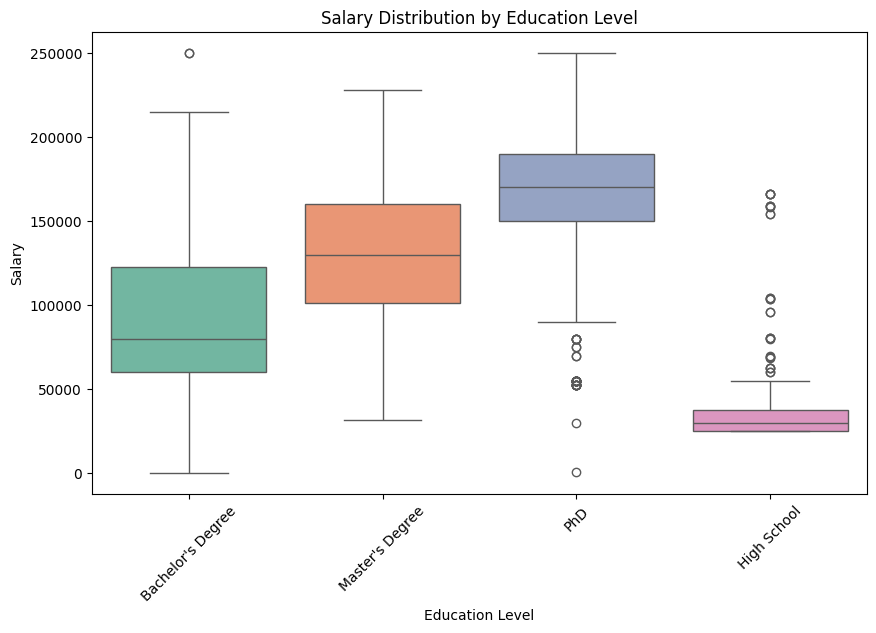

<ipython-input-183-52bb73bb97b3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education Level', y='Salary', data=df, palette="Set3")


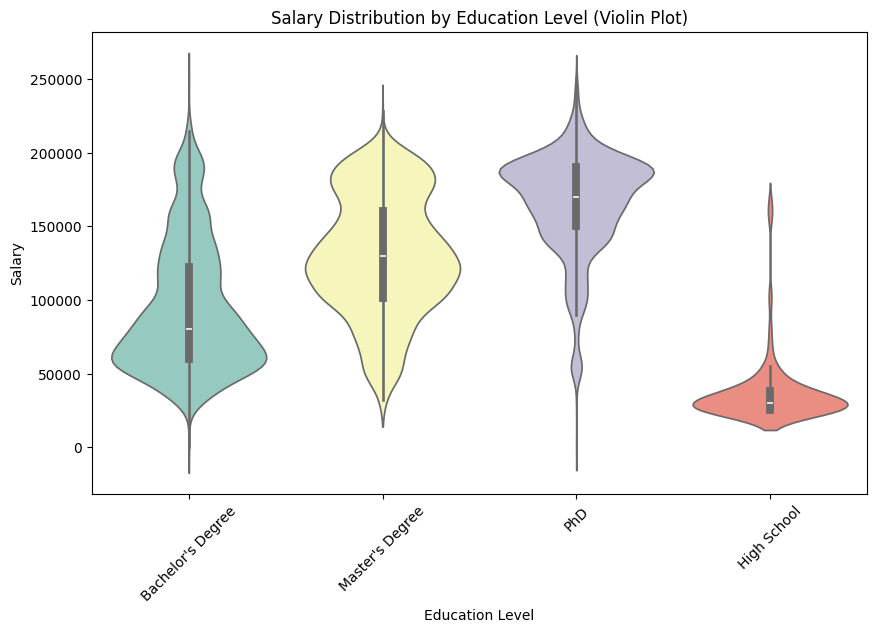

In [183]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=df, palette="Set2")

plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Education Level', y='Salary', data=df, palette="Set3")

plt.title('Salary Distribution by Education Level (Violin Plot)')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

We can clearly see that the higher one's education level is, the higher their salary would be

#### - **Are there any age differences between male and female employees? Try to visualize it.**

<ipython-input-184-8245bf24f1c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette="Set2")


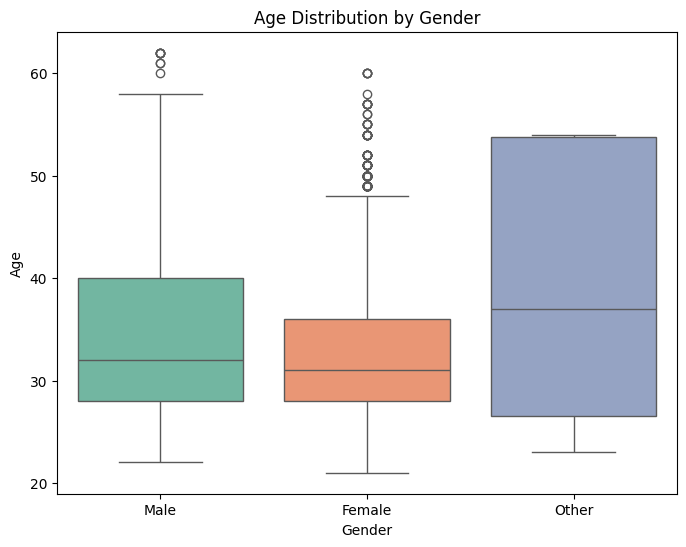

In [184]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df, palette="Set2")

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

Female employees are slightly younger overall - to be precise, there are less women closer to 40 years, their ages are less spread out

#### - **Do math and/or programming exam scores affect salary?**

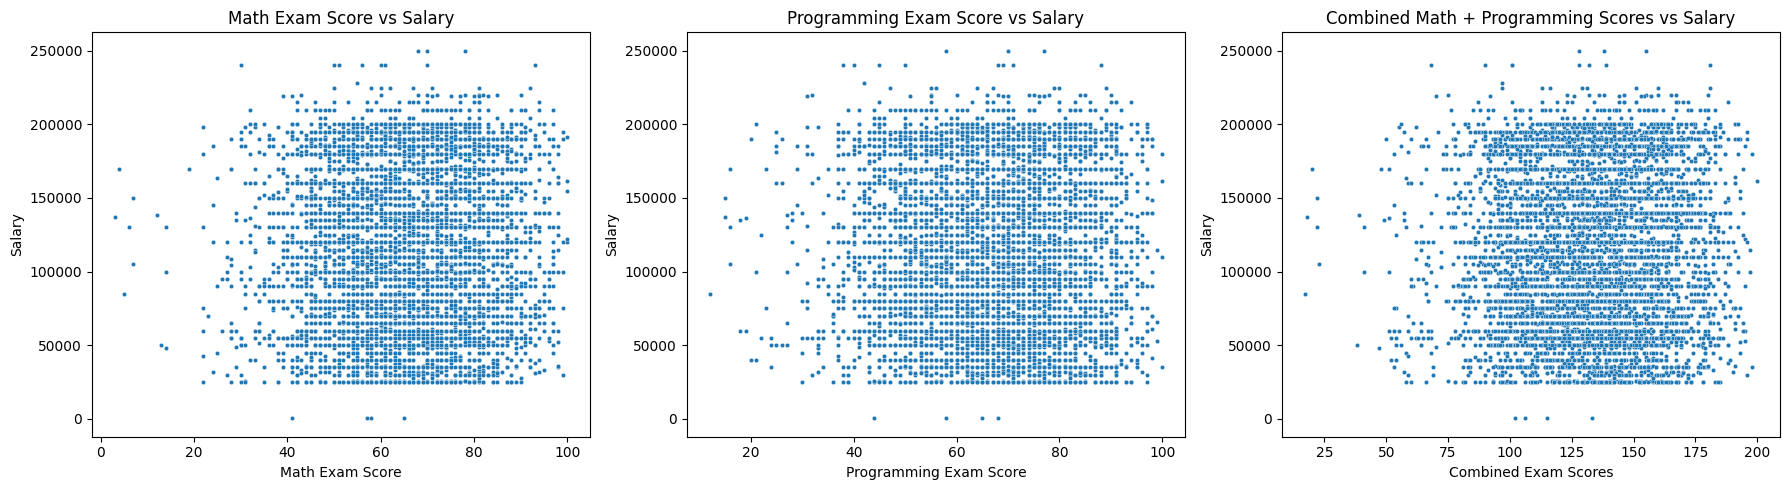

Correlation between Math Exam Score and Salary: 0.02
Correlation between Programming Exam Score and Salary: -0.02
Correlation between Combined Scores and Salary: 0.00


In [185]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Math exam score', y='Salary', data=df, s=10)
plt.title('Math Exam Score vs Salary')
plt.xlabel('Math Exam Score')
plt.ylabel('Salary')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Programming exam score', y='Salary', data=df, s=10)
plt.title('Programming Exam Score vs Salary')
plt.xlabel('Programming Exam Score')
plt.ylabel('Salary')

plt.subplot(1, 3, 3)
df['Combined Scores'] = df['Math exam score'] + df['Programming exam score']
sns.scatterplot(x='Combined Scores', y='Salary', data=df, s=10)
plt.title('Combined Math + Programming Scores vs Salary')
plt.xlabel('Combined Exam Scores')
plt.ylabel('Salary')

plt.tight_layout()

plt.show()

corr_math_salary = df[['Math exam score', 'Salary']].corr().iloc[0, 1]
corr_programming_salary = df[['Programming exam score', 'Salary']].corr().iloc[0, 1]
corr_combined_salary = df[['Combined Scores', 'Salary']].corr().iloc[0, 1]

print(f'Correlation between Math Exam Score and Salary: {corr_math_salary:.2f}')
print(f'Correlation between Programming Exam Score and Salary: {corr_programming_salary:.2f}')
print(f'Correlation between Combined Scores and Salary: {corr_combined_salary:.2f}')

In conclusion we can tell that there's no actual correlation between any exam scores and salary

#### - **Is there any association between math and programming exams scores?**

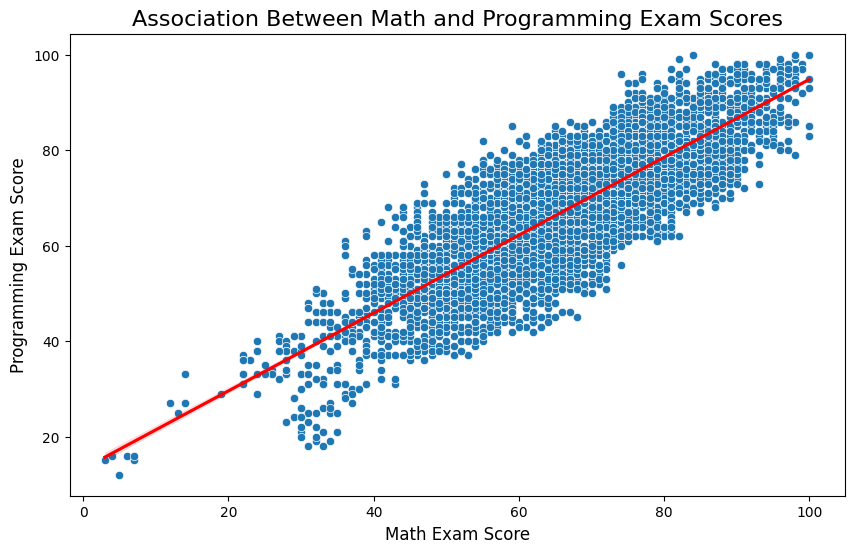

Correlation coefficient between Math and Programming Exam Scores: 0.82


In [186]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Math exam score', y='Programming exam score', data=df)

sns.regplot(x='Math exam score', y='Programming exam score', data=df, scatter=False, color='red')

plt.title('Association Between Math and Programming Exam Scores', fontsize=16)
plt.xlabel('Math Exam Score', fontsize=12)
plt.ylabel('Programming Exam Score', fontsize=12)

plt.show()


correlation = df[['Math exam score', 'Programming exam score']].corr().iloc[0, 1] #Correlation is close to 1
print(f'Correlation coefficient between Math and Programming Exam Scores: {correlation:.2f}')

There's a high positive correlation between math and programming scores, we can tell that usually if the student is smart enough, they are making good scores in both subjects

#### - **Are there any salary differences between male and female employees?** *+ additionally: discovering the cause*

<ipython-input-187-ebc1e941d9df>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')


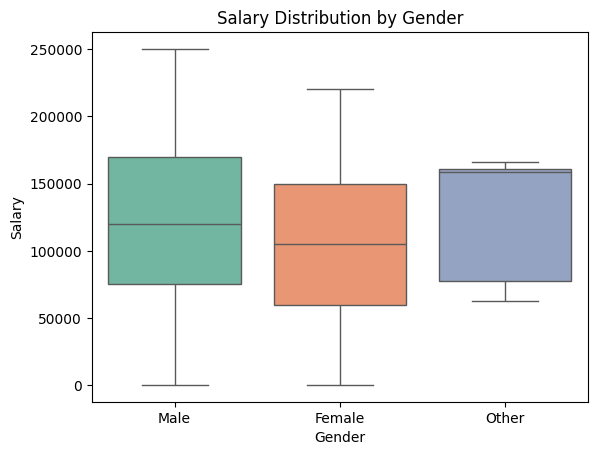

In [187]:
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')

plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

Female employees are paid less than males. To be more precise, they have a bit lower starting salaries and lower peak salaries.

- Let's figure out if the peak salaries for female is less because they do not take top-paid positions or they get less money on those top-paid positions as well
  - Are females underrepresented in the highest-paid positions?
  - Do females earn less within those top-paid positions?
  - Are there noticeable differences between the genders in specific salary range groups?

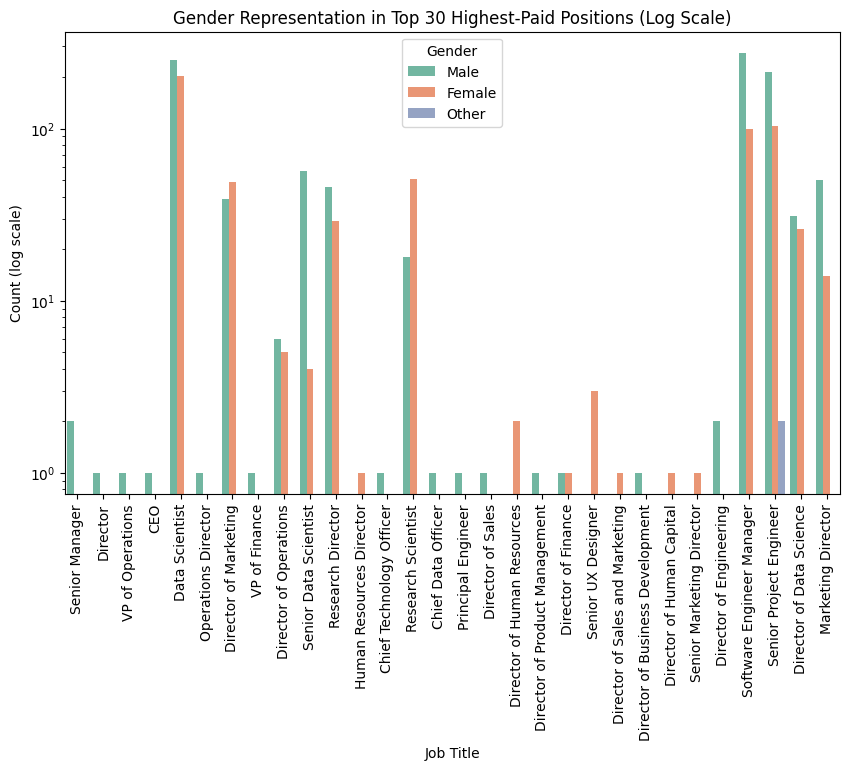

In [188]:
median_salaries = df.groupby('Job Title')['Salary'].median().reset_index()
median_salaries.columns = ['Job Title', 'Median Salary']
median_salaries = median_salaries.sort_values(by='Median Salary', ascending=False)
top30_jobs = median_salaries.head(30)['Job Title']

df_top_paid = df[df['Job Title'].isin(top30_jobs)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_paid, x='Job Title', hue='Gender', palette='Set2')

# Applied a logarithmic scale to the y-axis for better visibility
plt.yscale('log')

plt.title('Gender Representation in Top 30 Highest-Paid Positions (Log Scale)')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Count (log scale)')
plt.show()


<ipython-input-189-2e90e900a9ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_rep_agg, x='Gender', y='Salary', palette='Set2')


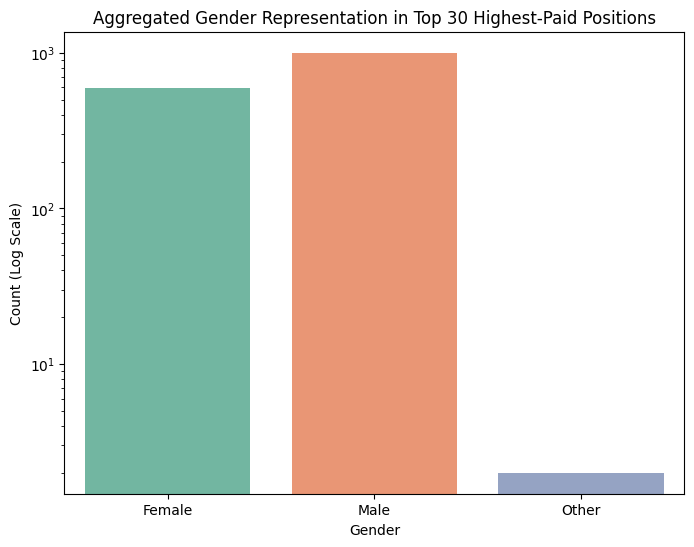

In [189]:

gender_rep_agg = df_top_paid.groupby('Gender')['Salary'].count().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_rep_agg, x='Gender', y='Salary', palette='Set2')

plt.title('Aggregated Gender Representation in Top 30 Highest-Paid Positions')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')

plt.show()


<ipython-input-190-0b7da576ef1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_paid_agg, x='Gender', y='Salary', palette='Set2')


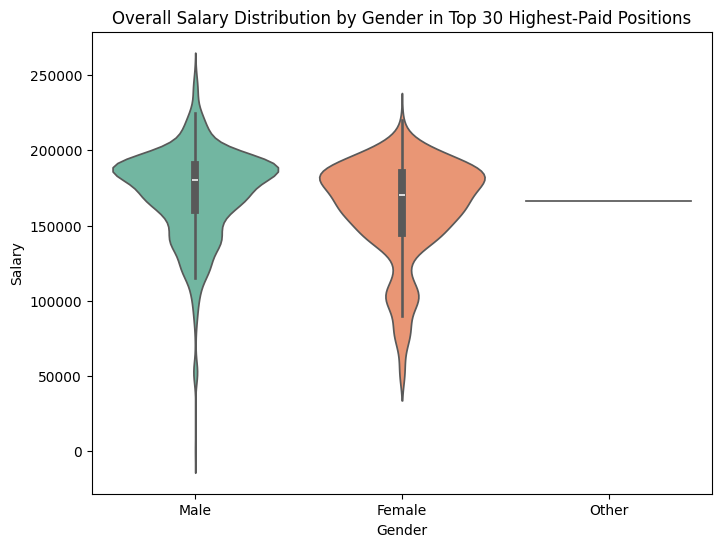

<ipython-input-190-0b7da576ef1a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_paid_agg, x='Gender', y='Salary', palette='Set2')


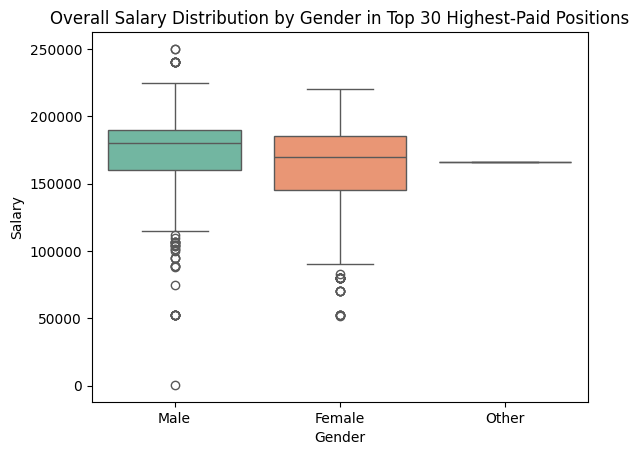

In [190]:
df_top_paid_agg = df_top_paid[['Gender', 'Salary']]

plt.figure(figsize=(8, 6))
sns.violinplot(data=df_top_paid_agg, x='Gender', y='Salary', palette='Set2')

plt.title('Overall Salary Distribution by Gender in Top 30 Highest-Paid Positions')
plt.show()

sns.boxplot(data=df_top_paid_agg, x='Gender', y='Salary', palette='Set2')

plt.title('Overall Salary Distribution by Gender in Top 30 Highest-Paid Positions')
plt.show()

<ipython-input-191-6d3d1467fa4b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_gender = df.groupby(['Gender', 'Salary Range']).size().reset_index(name='Count')


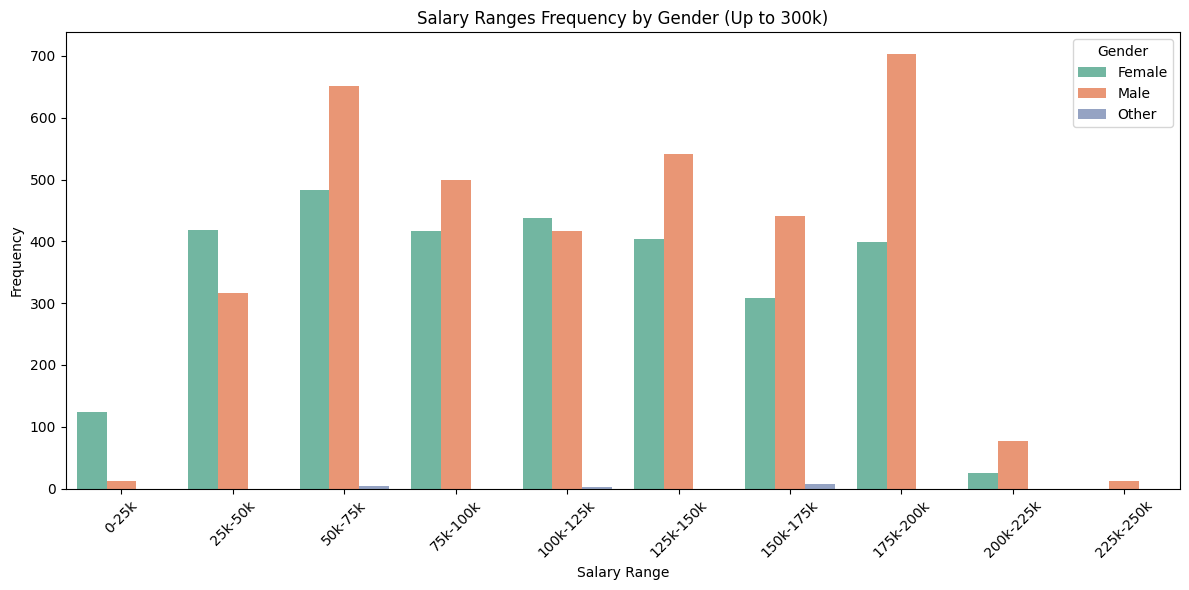

In [191]:
salary_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000]
salary_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k',
                 '150k-175k', '175k-200k', '200k-225k', '225k-250k']

df['Salary Range'] = pd.cut(df['Salary'], bins=salary_bins, labels=salary_labels, include_lowest=True)

salary_by_gender = df.groupby(['Gender', 'Salary Range']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=salary_by_gender, x='Salary Range', y='Count', hue='Gender', palette='Set2')

plt.title('Salary Ranges Frequency by Gender (Up to 300k)')
plt.ylabel('Frequency')
plt.xlabel('Salary Range')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In conclusion, we can see that there are more less-paid women on average in top30 most-paid professions. The gender representation in those positions is pretty even, however.

Also, interestingly, there are some heavily underpaid individuals in that top30 most paid jobs list, and most of them are males.

In the end, we can also say that there are more females within lowest salaries ranges and more males in higher salaries ranges.

#### - **Compare salaries of Data Scientists with Bachelor’s and PhD education levels, who work for at least 10 years. Are there any differences in this regard between genders?**

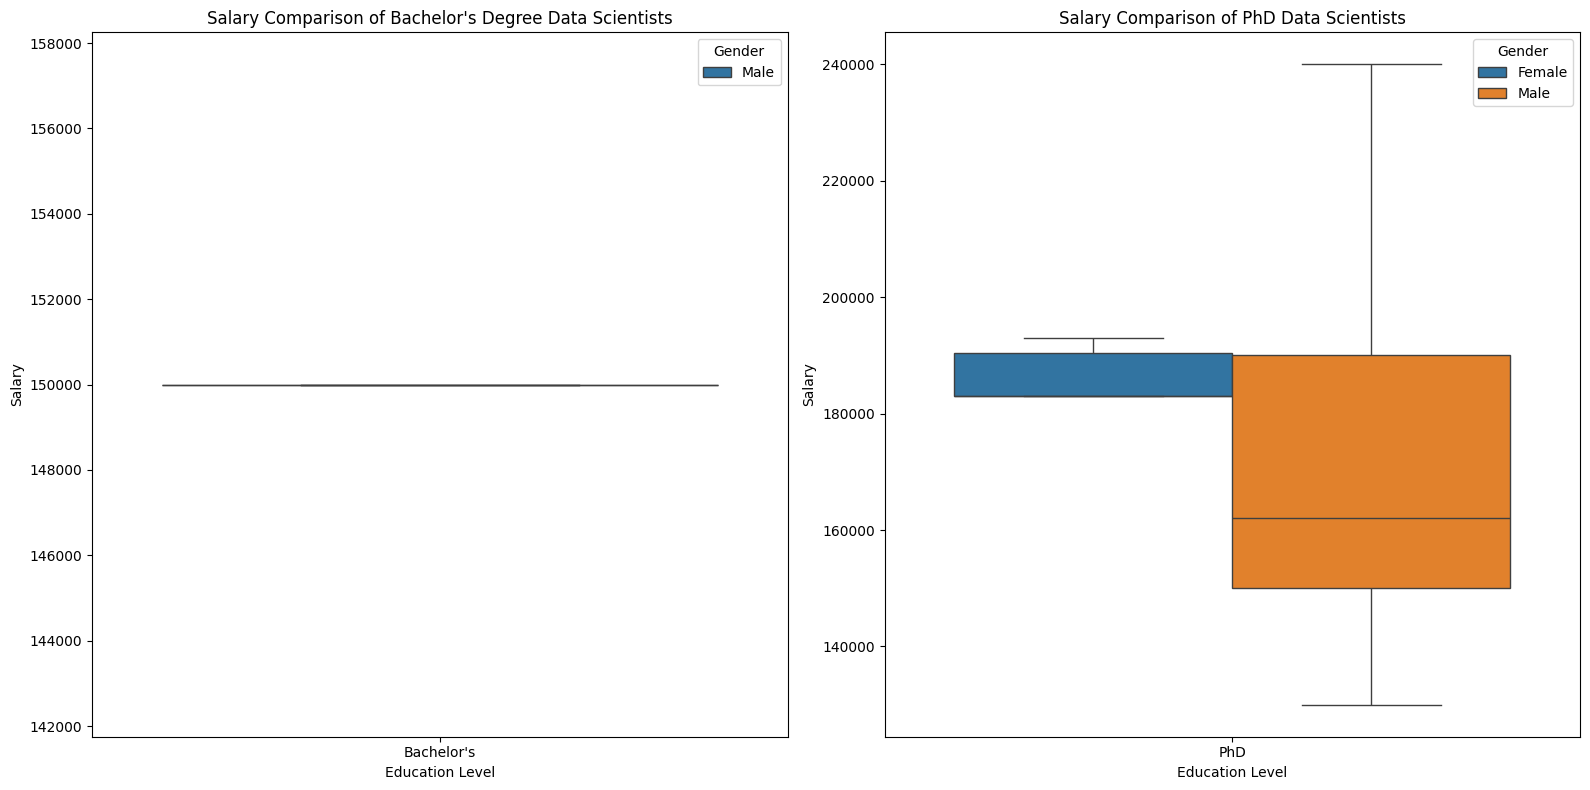

The only bachelor with set requirements:



,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Math exam score,Programming exam score,Age Group,Experience Bin,Combined Scores,Salary Range
2255,38.0,Male,Bachelor's,Data Scientist,10.0,150000.0,90,80,35-39,"(9.0, 10.0]",170,125k-150k


In [192]:
df['Education Level'] = df['Education Level'].replace({
    'Bachelor\'s Degree': 'Bachelor\'s',
    'phD': 'PhD'
})

filtered_data = df[
    (df['Job Title'] == 'Data Scientist') &
    (df['Education Level'].isin(['Bachelor\'s', 'PhD'])) &
    (df['Years of Experience'] >= 10)
]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(data=filtered_data[filtered_data['Education Level'] == 'Bachelor\'s'],
            x='Education Level', y='Salary', hue='Gender', ax=axes[0])
axes[0].set_title('Salary Comparison of Bachelor\'s Degree Data Scientists')
axes[0].set_ylabel('Salary')
axes[0].set_xlabel('Education Level')

sns.boxplot(data=filtered_data[filtered_data['Education Level'] == 'PhD'],
            x='Education Level', y='Salary', hue='Gender', ax=axes[1])
axes[1].set_title('Salary Comparison of PhD Data Scientists')
axes[1].set_ylabel('Salary')
axes[1].set_xlabel('Education Level')

plt.tight_layout()
plt.show()

print("The only bachelor with set requirements:\n")
filtered_data[filtered_data['Education Level'] == "Bachelor's"].head()

There are significantly more males within these requirements, and their salary range is wider. There are less females but their average salary is close to top.
And there's just one bachelor data scientist with 10 or more years of experience

#### - **Task (additional): Analyze the salary level for each speciality**

In [193]:
df_without_experience_level = df.copy()
df_without_experience_level['Job Title'] = df_without_experience_level['Job Title'].replace(
    {'Junior ': '', 'Middle ': '', 'Senior ': ''}, regex=True
)

salary_stats_by_job = df_without_experience_level.groupby('Job Title')['Salary'].agg(['min', 'mean', 'max']).reset_index()

salary_stats_by_job

,Job Title,min,mean,max
0,Account Executive,95000.0,95000.000000,95000.0
1,Account Manager,45000.0,71250.000000,110000.0
2,Accountant,35000.0,58333.333333,90000.0
3,Administrative Assistant,45000.0,50000.000000,55000.0
4,Advertising Coordinator,45000.0,45000.000000,45000.0
...,...,...,...,...
124,UX Researcher,65000.0,65000.000000,65000.0
125,VP of Finance,200000.0,200000.000000,200000.0
126,VP of Operations,190000.0,190000.000000,190000.0
127,Web Designer,45000.0,45000.000000,45000.0


#### - **Task (additional): Education level distribution among genders**

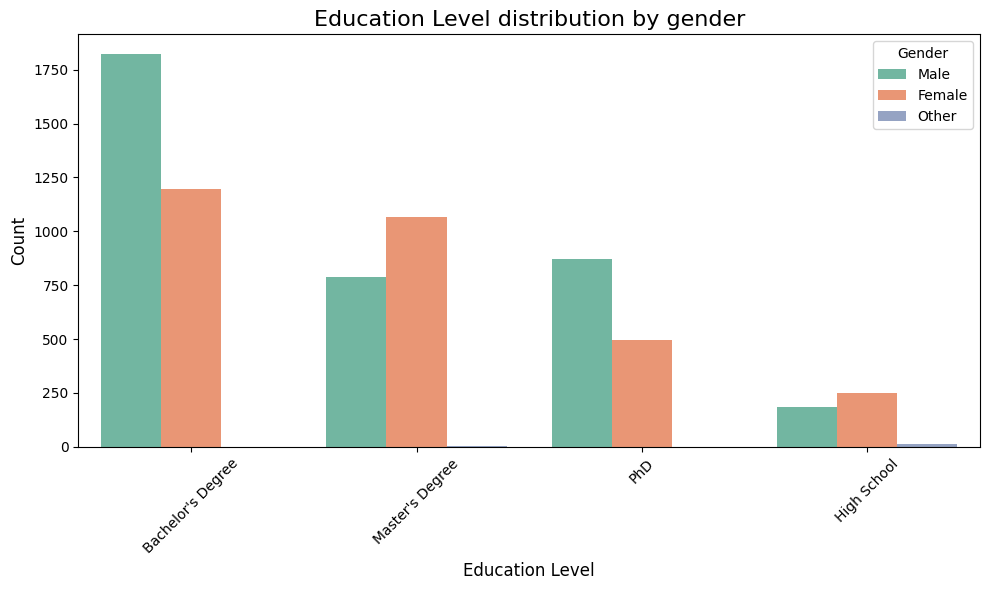

In [194]:
df_without_experience_level['Education Level'] = df_without_experience_level['Education Level'].replace({
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
    'phD': 'PhD'
})

plt.figure(figsize=(10, 6))
sns.countplot(data=df_without_experience_level, x='Education Level', hue='Gender', palette='Set2')

plt.title('Education Level distribution by gender', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


There are more males with bachelors and phD degrees and slightly more high school and masters degree females

#### - **Task (additional): To test the hypothesis - whether age affects educational attainment.**

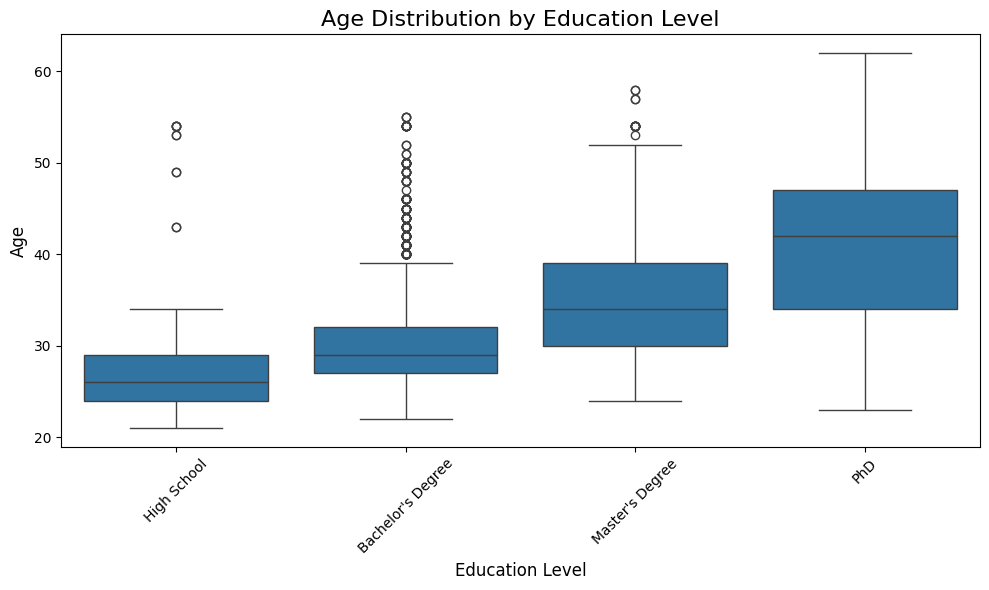

In [195]:
education_order = ['High School', "Bachelor's Degree", "Master's Degree", 'PhD']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_without_experience_level, x='Education Level', y='Age', order=education_order)

plt.title('Age Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The older employee is, the more likely they have higher education degree